# Preprocessing

In [1]:
import pandas as pd
import ydata_profiling as ydp
from bs4 import BeautifulSoup
import re
from pathlib import Path

In [2]:
debug_mode = False

## Load dataset

In [3]:
df = pd.read_csv('./data/orig_dataset.csv')
df.head()

,id,זמןסיוםמהמערכת,יישוב,סמל_יישוב,שעתהגעהלנקודה,נ.צכתובת,כתובתתיאורמיקוםנקודתהמדידה,סוגנקודתהמדידהתשובה,Index1,time,...,heged4,heged5,heged6,heged7,heged8,heged9,heged10,heged11,heged12,heged13
0,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,1,09:38:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,2,09:50:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,3,09:51:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,4,09:52:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,5,09:55:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rename the headers

In [4]:
df_cols_renamed = df.rename(columns={'זמןסיוםמהמערכת': 'sys_end_time',
                        'יישוב' : 'city',
                        'סמל_יישוב' : 'city_code',
                        'שעתהגעהלנקודה' : 'time_of_arrival',
                        'נ.צכתובת' : 'geo_location',
                        'כתובתתיאורמיקוםנקודתהמדידה' : 'location_address',
                        'סוגנקודתהמדידהתשובה' : 'location_type',
                        'teorshlilihiyuvi' : 'attitude',
                        'teortext' : 'description',
                        'heged1' : 'notes',
                        'parit' : 'littered_object'
    })

In [5]:
# prof = ydp.ProfileReport(df_cols_renamed)
# prof.to_notebook_iframe()

In [6]:
df_cols_renamed[~df.heged1.isnull()]
df_cols_renamed.isnull().sum() / df_cols_renamed.shape[0] * 100

id                   0.000000
sys_end_time         0.000000
city                 0.000000
city_code            0.000000
time_of_arrival      0.487393
geo_location        38.532196
location_address     0.000000
location_type        0.000000
Index1               0.000000
time                 6.420471
littered_object      3.046209
attitude             2.296373
description          3.496110
gender               0.000000
age                  0.018746
point_type           0.000000
notes               38.532196
heged2              87.449620
heged3              95.632205
heged4              98.453463
heged5              99.550098
heged6              99.821914
heged7              99.896898
heged8              99.953135
heged9              99.990627
heged10             99.990627
heged11             99.990627
heged12             99.990627
heged13             99.990627
dtype: float64

## Columns / Nulls manipulations

### Remove heged2 - heged13 due to high null counts

In [7]:
df_dropped = df_cols_renamed.drop(columns=[f'heged{i}' for i in range(2,14)])
df_dropped.head()

,id,sys_end_time,city,city_code,time_of_arrival,geo_location,location_address,location_type,Index1,time,littered_object,attitude,description,gender,age,point_type,notes
0,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,1,09:38:00,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,רחוב מגורים,NaN
1,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,2,09:50:00,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,רחוב מגורים,NaN
2,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,3,09:51:00,NaN,חיובית,לא נזרק,נקבה,30-49,רחוב מגורים,NaN
3,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,4,09:52:00,NaN,חיובית,לא לכלכה,נקבה,10-19,רחוב מגורים,NaN
4,1,2021-07-07 10:22:27,רמלה,8500,09:20:00,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,5,09:55:00,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,רחוב מגורים,NaN


### Rename cities and move to seperate csv

In [8]:
df_cities = df_cols_renamed[['city_code', 'city']].drop_duplicates()
df_cities = df_cities.sort_values(by='city_code').reset_index(drop=True)
display(df_cities)
print(df_cities.shape)

,city_code,city
0,2,מרום הגליל
1,8,הגלבוע
2,12,זבולון
3,29,חבל יבנה
4,31,אופקים
...,...,...
74,8500,רמלה
75,8800,שפרעם
76,9000,באר שבע
77,9200,בית שאן


(79, 2)


In [9]:
if not Path('data/cities.html').exists():
     with open('data/cities.html') as cities, \
          open('data/local_councils.html') as local_councils, \
          open('data/regional_councils.html') as regional_councils:
               city_parser = BeautifulSoup(''.join(cities.readlines()), 'html.parser')
               local_councils_parser = BeautifulSoup(''.join(local_councils.readlines()), 'html.parser')
               regional_councils_parser = BeautifulSoup(''.join(regional_councils.readlines()), 'html.parser')

In [10]:
def get_settlements(parser, heb_loc=4):
    rows = parser.find('table').find_all('tr')
    settlements = []
    for row in rows:
        cells = row.find_all('td')
        if len(cells) > 0:
            settlements += [(
                cells[heb_loc].text.rstrip('\n'), 
                cells[2].text
            )]
    return settlements

In [11]:
if not Path('data/cities.csv').exists():
    cities = get_settlements(city_parser) + get_settlements(local_councils_parser) + get_settlements(regional_councils_parser,3)
    cities_hebeng = pd.DataFrame(cities, columns=['city', 'city_eng'])
    cities_merged = pd.merge(df_cities, cities_hebeng, on='city', how='left')
    print(list(cities_merged[cities_merged.city_eng.isnull()]['city']))
    print(cities_merged.city_eng.isnull().sum())
    cities_merged[cities_merged.city_eng.isnull()].reset_index(drop=True)

In [12]:
if not Path('data/cities.csv').exists():
    missing_cities = {
        'הגלבוע' : 'Gilboa',
        'קריית עקרון' : 'Kiryat Ekron',
        'כאוכב אבו אל-היגא' : 'Kaokab Abu al-Hija', 
        'סאגור' : 'Sajur',
        'טובא-זנגרייה' : 'Tuba-Zangariyye', 
        'קריית מלאכי' : 'Kiryat Malakhi',
        'לקייה' : 'Lakiya',
        'קריית יערים': 'Kiryat Ye\'arim',
        'גדיידה-מכר' : 'Judeide-Maker',
        'בסמה' : 'Basma',
        'קריית גת' : 'Kiryat Gat',
        'קריית שמונה' : 'Kiryat Shmona',
        'באקה אל-גרביה' : 'Baqa al-Gharbiyye',
        'קריית ים' : 'Kiryat Yam',
        'מגאר' : 'Maghar',
        'בועיינה-נוגידאת' : 'Bu\'eine Nujeidat',
        'עארבה' : 'Arraba',
        'כעביה-טבאש-חגאגרה' : 'Ka\'abiyye-Tabbash-Hajajre',
        'קריית ארבע' : 'Kiryat Arba'
    }
    cities_merged['city_eng'] = cities_merged['city_eng'].fillna(cities_merged['city'].map(missing_cities))

In [13]:
if not Path('data/cities.csv').exists():
    cities_merged = cities_merged.rename(columns={'city' : 'city_heb', 'city_eng' : 'city'})
    cities_merged.to_csv('data/cities.csv', index=False)

In [14]:
cities_merged = pd.read_csv('data/cities.csv')

now we can safely dispose of the `city` column

In [15]:
df_dropped = df_dropped.drop(['city'], axis=1)

### No clear usage for `Index1`, `id`, and `time_of_arrival` - better drop
`point_type` and `location_type` are duplicates of each other, dropping one of them

In [16]:
df_dropped = df_dropped.drop(['time_of_arrival', 'id', 'Index1', 'point_type'], axis=1)
df_dropped.head()

,sys_end_time,city_code,geo_location,location_address,location_type,time,littered_object,attitude,description,gender,age,notes
0,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:38:00,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN
1,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:50:00,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN
2,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:51:00,NaN,חיובית,לא נזרק,נקבה,30-49,NaN
3,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:52:00,NaN,חיובית,לא לכלכה,נקבה,10-19,NaN
4,2021-07-07 10:22:27,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,09:55:00,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,NaN


### Neither `sys_end_time` nor `time` columns are useful by themselfs
But combined together can provide more info - so let's combine them

In [17]:
df_dropped = df_dropped.dropna(subset=['time'])
df_dropped['sys_end_time'] = df_dropped.sys_end_time.apply(lambda x: x.split(' ')[0])
df_dropped['incident_time'] = df_dropped.apply(lambda x: str(x['sys_end_time']) + ' ' + str(x['time']), axis=1)
df_dropped['incident_time'] = pd.to_datetime(df_dropped.incident_time)

In [18]:
df_dropped = df_dropped.drop(['sys_end_time', 'time'], axis=1)
df_dropped.head()

,city_code,geo_location,location_address,location_type,littered_object,attitude,description,gender,age,notes,incident_time
0,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00
1,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00
2,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק,נקבה,30-49,NaN,2021-07-07 09:51:00
3,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא לכלכה,נקבה,10-19,NaN,2021-07-07 09:52:00
4,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,NaN,2021-07-07 09:55:00


In [19]:
df_dropped[
    df_dropped.geo_location.isnull() & 
    df_dropped.location_address.str.contains('\n') &
    df_dropped.location_address.str.contains(',')
]

,city_code,geo_location,location_address,location_type,littered_object,attitude,description,gender,age,notes,incident_time
10117,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,צלחת חד פעמית,שלילית,השארת הצלחת על השולחן,זכר,20-29,אנשים שישבו בשטח נקודת המדידה והשאירו אחריהם פ...,2021-10-13 17:01:00
10118,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,כוס פלסטיק חד פעמית,שלילית,השלכת הכוס מסביב לשולחן,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-13 17:35:00
10119,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,צלחת חד פעמית,חיובית,העביר לאשפתון,זכר,10-19,NaN,2021-10-13 17:55:00
10120,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,בדל סיגריות,שלילית,השליך את הבדל ליד השולחן,זכר,30-49,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-10-13 18:10:00
10121,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש,בקבוק שתיה,שלילית,השאיר על השולחן,זכר,30-49,אנשים שישבו בשטח נקודת המדידה והשאירו אחריהם פ...,2021-10-13 18:23:00
...,...,...,...,...,...,...,...,...,...,...,...
10664,531,NaN,"שוק עירוני \r\nכביש 804\r\n32.860423, 35.336471",מרכז מסחרי,בדלי סיגריות,שלילית,NaN,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 10:43:00
10665,531,NaN,"מול הדואר – דאר אל ביאן\r\n32.852238, 35.333659",רחוב מגורים,בדלי סיגריות,שלילית,NaN,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 08:14:00
10666,531,NaN,"מול הדואר – דאר אל ביאן\r\n32.852238, 35.333659",רחוב מגורים,בדלי סיגריות,שלילית,NaN,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 09:25:00
10667,531,NaN,"מול הדואר – דאר אל ביאן\r\n32.852238, 35.333659",רחוב מגורים,מיכל משקה,שלילית,NaN,נקבה,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-10-12 09:57:00


In [20]:
df_locations = df_dropped[['city_code','geo_location', 'location_address', 'location_type']].drop_duplicates().reset_index(drop=True)
df_locations[
    df_locations.geo_location.isnull() & 
    df_locations.location_address.str.contains('\n') &
    df_locations.location_address.str.contains(',')
    ]

,city_code,geo_location,location_address,location_type
1400,7300,NaN,"הר הקפיצה\r\n32.683056, 35.299389",פנאי ונופש
1401,7300,NaN,"רחוב 2004 3 (אולמות אבו מאהר)\r\n32.689018, 35...",אזור תעשייה
1402,7300,NaN,אל פאח'ורה – שכונת מגורים דרך מוביל לבית ספר\r...,מבנה ציבור
1404,7300,NaN,"אל פאח'ורה – משחקייה\r\n1040 2-18, נצרת\r\n32....",פנאי ונופש
1405,7300,NaN,"כביש מסחרי מול כיכר ביג\r\n3001, נצרת\r\n32.69...",רחוב מסחרי
1468,975,NaN,"אזור תעשיה המקביל לכביש 7626\r\n32.732292, 35....",אזור תעשייה
1470,975,NaN,"אזור תעשיה 2\r\n32.736401, 35.219963",אזור תעשייה
1476,975,NaN,"רח' מוביל לבית ספר זרזיר יסודי \r\n32.729393, ...",מבנה ציבור
1477,975,NaN,"מזאריב- בית ספר ערב אלמזאריב\r\n32.715458, 35....",רחוב מגורים
1478,975,NaN,"אלגריפאת- רח' אלרשיד\r\n32.724983, 35.213535",רחוב מגורים


### No point in keeping records with no geolocation - let's drop them

In [21]:
df_dropped = df_dropped.dropna(subset=['geo_location'])
df_dropped = df_dropped.reset_index(drop=True)
df_dropped

,city_code,geo_location,location_address,location_type,littered_object,attitude,description,gender,age,notes,incident_time
0,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00
1,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00
2,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק,נקבה,30-49,NaN,2021-07-07 09:51:00
3,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא לכלכה,נקבה,10-19,NaN,2021-07-07 09:52:00
4,8500,"31.9224141,34.8685917",רחוב זכריה,רחוב מגורים,NaN,חיובית,לא נזרק לכלוך,נקבה,20-29,NaN,2021-07-07 09:55:00
...,...,...,...,...,...,...,...,...,...,...,...
6057,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,בדל סיגריה,שלילית,גבר זרק בדל סיגריה מהרכב בזמן נהיגה,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 12:47:00
6058,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,שקית אשפה,חיובית,בחור צעיר שיצא ממבנה זרק שקית אשפה לפח,זכר,10-19,NaN,2021-11-25 13:07:00
6059,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,מיכל משקה,שלילית,ילדה קטנה עוברת רגל השליכה מיכל משקה לריצפה,נקבה,10-19,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:31:00
6060,2710,"32.8137707,35.2709865",לעיון אום אלפחם,רחוב מסחרי,בדל סיגריה,שלילית,בחור צעיר שעמד בצד ועישן סיגריה \r\nכשסיים זרק...,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:55:00


### `location_address` not usefull - let's drop it

In [22]:
df_dropped = df_dropped.drop(['location_address'], axis=1)

### Now, let's take a look at the remaining nulls

In [23]:
print('percentage of not nulls:',df_dropped[
    ~((df_dropped.littered_object.isnull()) |
    (df_dropped.attitude.isnull()) |
    (df_dropped.description.isnull()) |
    (df_dropped.age.isnull()))
].shape[0] / df_dropped.shape[0] * 100)

percentage of not nulls: 92.87363906301552


We see that it's ok to remove the nulls in this case

In [24]:
df_dropped = df_dropped.dropna(subset=['littered_object', 'attitude', 'description', 'age'])
df_dropped = df_dropped.reset_index(drop=True)
df_dropped

,city_code,geo_location,location_type,littered_object,attitude,description,gender,age,notes,incident_time
0,8500,"31.9224141,34.8685917",רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00
1,8500,"31.9224141,34.8685917",רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00
2,874,"32.6753736,35.2392182",רחוב מסחרי,סיגריה,שלילית,השלכה,זכר,30-49,אדם עמד להיכנס למבנה וזרק את פריט הלכלוך לפני ...,2021-07-08 11:20:00
3,874,"32.6753736,35.2392182",רחוב מסחרי,שקית נילון,שלילית,השלכה,זכר,50-69,NaN,2021-07-08 11:25:00
4,874,"32.6753736,35.2392182",רחוב מסחרי,שקיות,חיובית,השלכה ברכב,נקבה,30-49,NaN,2021-07-08 11:55:00
...,...,...,...,...,...,...,...,...,...,...
5625,2710,"32.8137707,35.2709865",רחוב מסחרי,בדל סיגריה,שלילית,גבר זרק בדל סיגריה מהרכב בזמן נהיגה,זכר,30-49,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 12:47:00
5626,2710,"32.8137707,35.2709865",רחוב מסחרי,שקית אשפה,חיובית,בחור צעיר שיצא ממבנה זרק שקית אשפה לפח,זכר,10-19,NaN,2021-11-25 13:07:00
5627,2710,"32.8137707,35.2709865",רחוב מסחרי,מיכל משקה,שלילית,ילדה קטנה עוברת רגל השליכה מיכל משקה לריצפה,נקבה,10-19,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:31:00
5628,2710,"32.8137707,35.2709865",רחוב מסחרי,בדל סיגריה,שלילית,בחור צעיר שעמד בצד ועישן סיגריה \r\nכשסיים זרק...,זכר,20-29,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-25 13:55:00


### Combine back the `city` column

In [25]:
df_merged = pd.merge(df_dropped, cities_merged)
df_merged = df_merged.drop(['city_code'], axis=1)
df_merged = df_merged.drop(['city_heb'], axis=1)
df_merged

,geo_location,location_type,littered_object,attitude,description,gender,age,notes,incident_time,city
0,"31.9224141,34.8685917",רחוב מגורים,בשעות בהם בוצעה הסקירה לא נכחו אנשים,חיובית,אין,נקבה,50-69,NaN,2021-07-07 09:38:00,Ramla
1,"31.9224141,34.8685917",רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00,Ramla
2,"31.9238479,34.8596335",רחוב מגורים,סיגריה,שלילית,אדם סיים לעשן סיגריה וזרק את הסוף ברחוב,זכר,20-29,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 10:40:00,Ramla
3,"31.9238479,34.8596335",רחוב מגורים,חבילת סגריות,שלילית,אדם עישן סיים חבילה וזרק אותה על הרצפה,זכר,30-49,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-07-12 10:58:00,Ramla
4,"31.9238479,34.8596335",רחוב מגורים,שקית שוקו,שלילית,ילד סיים שקית שוקו וזרק אותה לתוך אדנית מלאה בזבל,זכר,10-19,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 11:20:00,Ramla
...,...,...,...,...,...,...,...,...,...,...
5625,"31.3262695,34.8809186",רחוב מסחרי,מגבונים,חיובית,אישה השליכה לאשפתון,נקבה,20-29,NaN,2021-11-18 17:07:00,Lakiya
5626,"31.3262695,34.8809186",רחוב מסחרי,אריזות נייר,חיובית,עובדת חנות כלי כתיבה השליך לפח,נקבה,20-29,NaN,2021-11-18 17:11:00,Lakiya
5627,"31.3262695,34.8809186",רחוב מסחרי,כוס קלקר,שלילית,נהג השליך מחלון הרכב כוס קלקר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 17:13:00,Lakiya
5628,"31.3262695,34.8809186",רחוב מסחרי,מסכה,שלילית,צעיר ירד מהאוטובוס והשליך המסכה ליד האשפתון,זכר,20-29,אחר (יש לפרט את התיאור המתאים בהערות),2021-11-18 17:16:00,Lakiya


In [26]:
df_merged['littered_object'] = df_merged['littered_object'].apply(lambda x: re.sub(r'[^א-ת ]', '', x))
df_merged = df_merged[df_merged.littered_object != ''].reset_index(drop=True)
df_merged = df_merged[df_merged.littered_object.apply(lambda x: len(x.split())<=3)].reset_index(drop=True)

### Split `geo_location` to `longitude` and `latitude`

In [27]:
df_merged['longitude'] = df_merged.geo_location.apply(lambda x: float(x.split(',')[1]))
df_merged['latitude'] = df_merged.geo_location.apply(lambda x: float(x.split(',')[0]))
df_merged = df_merged.drop(['geo_location'], axis=1)
df_merged

,location_type,littered_object,attitude,description,gender,age,notes,incident_time,city,longitude,latitude
0,רחוב מגורים,אין,חיובית,אדם שהלך עם צידנית,זכר,50-69,NaN,2021-07-07 09:50:00,Ramla,34.868592,31.922414
1,רחוב מגורים,סיגריה,שלילית,אדם סיים לעשן סיגריה וזרק את הסוף ברחוב,זכר,20-29,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 10:40:00,Ramla,34.859634,31.923848
2,רחוב מגורים,חבילת סגריות,שלילית,אדם עישן סיים חבילה וזרק אותה על הרצפה,זכר,30-49,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-07-12 10:58:00,Ramla,34.859634,31.923848
3,רחוב מגורים,שקית שוקו,שלילית,ילד סיים שקית שוקו וזרק אותה לתוך אדנית מלאה בזבל,זכר,10-19,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 11:20:00,Ramla,34.859634,31.923848
4,רחוב מגורים,עטיפת עוגיות,שלילית,כמה חברים ישבו עם חבילת עוגיות וכשסיימו היא נש...,זכר,10-19,ילד שהשליך פריט לכלוך,2021-07-12 11:41:00,Ramla,34.859634,31.923848
...,...,...,...,...,...,...,...,...,...,...,...
5372,רחוב מסחרי,מגבונים,חיובית,אישה השליכה לאשפתון,נקבה,20-29,NaN,2021-11-18 17:07:00,Lakiya,34.880919,31.326269
5373,רחוב מסחרי,אריזות נייר,חיובית,עובדת חנות כלי כתיבה השליך לפח,נקבה,20-29,NaN,2021-11-18 17:11:00,Lakiya,34.880919,31.326269
5374,רחוב מסחרי,כוס קלקר,שלילית,נהג השליך מחלון הרכב כוס קלקר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 17:13:00,Lakiya,34.880919,31.326269
5375,רחוב מסחרי,מסכה,שלילית,צעיר ירד מהאוטובוס והשליך המסכה ליד האשפתון,זכר,20-29,אחר (יש לפרט את התיאור המתאים בהערות),2021-11-18 17:16:00,Lakiya,34.880919,31.326269


## Textual data analysis/cleanup
<!-- unique_items[
    (unique_items.littered_object.str.len() < 20) &
    unique_items.littered_object.str.contains('סיגר') |
    unique_items.littered_object.str.contains('סגר') |
    unique_items.littered_object.str.contains('בדל')
    # & unique_items.littered_object.str.len() < 20
].tail(10) -->

### Litter type clustering

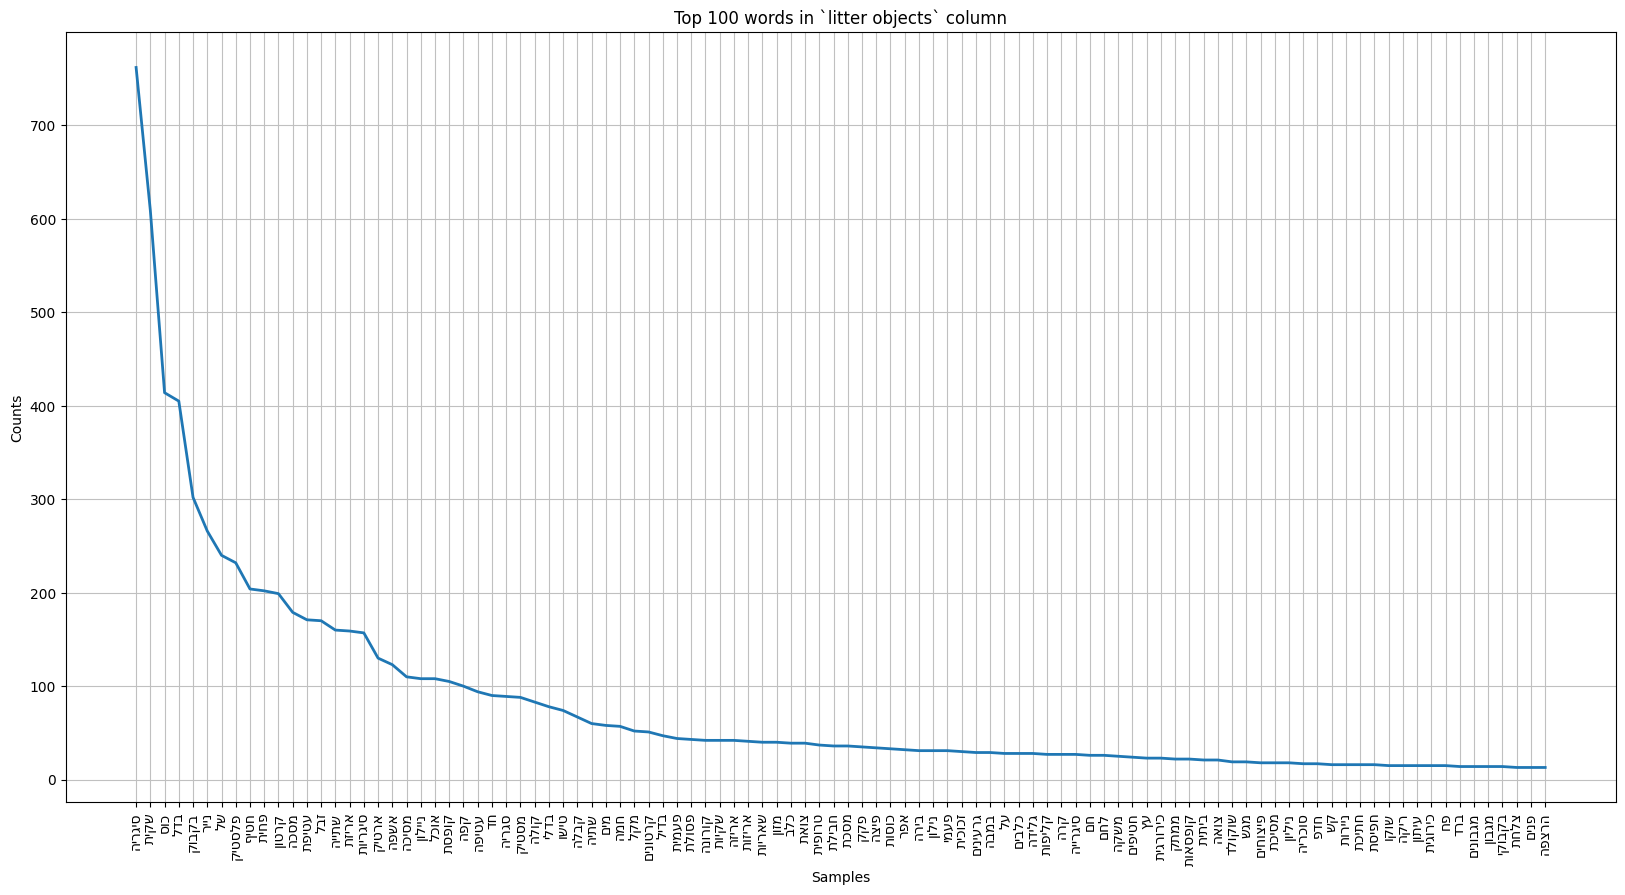

In [28]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

litter_objects = ' '.join(df_merged.littered_object)
litter_objects = re.sub(r'[^א-ת ]', '', litter_objects)
litter_objects = re.sub(r' +', ' ', litter_objects)
litter_objects = litter_objects.split()
litter_objects = [word for word in litter_objects if len(word) > 1]
litter_objects = [word[::-1] for word in litter_objects]
litter_objects_freq = FreqDist(litter_objects)

top_n = 100
plt.figure(figsize=(20,10))
litter_objects_freq.plot(top_n, cumulative=False, title=f'Top {top_n} words in `litter objects` column')
plt.show()
litter_objects = [word[::-1] for word in litter_objects]
litter_objects_freq = FreqDist(litter_objects)

In [29]:
pd.DataFrame(litter_objects_freq.most_common(top_n)).rename(columns={0:'word', 1:'count'}) #\.to_csv('data/litter_objects.csv', index=False)

,word,count
0,סיגריה,762
1,שקית,609
2,כוס,414
3,בדל,405
4,בקבוק,302
...,...,...
95,מגבון,14
96,בקבוקי,14
97,צלחת,13
98,פנים,13


In [30]:
unique_items = df_merged.littered_object.apply(lambda x: x.split(' ')[0]).value_counts().to_dict()
unique_items = pd.DataFrame(unique_items, index=[0]) \
    .transpose().reset_index() \
    .rename(columns={
        'index' : 'littered_object',
        0 : 'count'
    })
unique_items = unique_items \
            .sort_values(by='count', ascending=False) \
            .reset_index(drop=True)
top_categories = unique_items[unique_items['count'] > 10].rename(columns={'littered_object' : 'category'})
top_categories.head(20)

,category,count
0,שקית,609
1,כוס,413
2,בדל,405
3,סיגריה,294
4,בקבוק,281
5,פחית,201
6,מסכה,179
7,נייר,171
8,עטיפת,170
9,אריזת,159


In [31]:
subcategory = {}
category = {}

bag_reg = r"^"+r"שק"
cup_reg = r"כוס"
filter_reg = r"בד" + r"\S?\S"
cig_reg = r"ס" + r"\S?" + r"גר" + r"\S?"
box_reg = r"קופ" + r"\S?" + r"ס" + r"\S?" # + r"|" r"ח" + r"\S" + r"י" + r"\S"
bottle_reg = r"בקבוק"
tin_reg = r"פחי" + r"\S+"
mask_reg = r"מס" + r"\S?" + r"כ" + r"\S+\s?"
paper_reg = r"ני" + r"\S?" + r"ר"
sheet_reg = r"ד" + r"[פף]"
paper_reg = paper_reg + r"|" + sheet_reg
package_reg = r"עטיפ" + r"|" + r"אריז"
snack_package_reg = r"ח" + r"[טת]" +r"י" + r"[פף]"
package_reg = package_reg + r"|" + snack_package_reg
cardboard_reg = r"קרטו"
poop_regs = [r"צוא"+r"\S", r"קקי", r"פרש", r"חרא"]
poop_reg = r'|'.join(poop_regs)

icecream_reg = r"ארטיק"
gum_reg = r"מסטיק"
snacks_reg = '|'.join([icecream_reg, gum_reg])
clusters_predicate = False

In [32]:
def cluster(df, subcategory, reg, cls, clusters_predicate):
    predicate = df.littered_object.str.contains(reg)
    subcategory[cls] = df[predicate & ~clusters_predicate].littered_object.unique()
    clusters_predicate = clusters_predicate | predicate
    if debug_mode:
        print('# of records (' + cls + '):', len(df[df.littered_object.isin(subcategory[cls])]))
        print('included subtypes:', subcategory[reg])
    return clusters_predicate

In [33]:
def display_clusters(df, subcategory):
    cluster_sizes = {
        cls : len(df[df.littered_object.isin(subcategory[cls])]) for cls in subcategory    
    }
    cluster_sizes = pd.DataFrame(cluster_sizes, index=[0]) \
        .transpose().reset_index() \
        .rename(columns={0: 'count', 'index' : 'category'})
    display(cluster_sizes)

def get_remainder(df, clusters_predicate):
    remainder = df[~clusters_predicate].littered_object
    remainder = remainder.value_counts()
    remainder = pd.DataFrame(remainder).reset_index().rename(columns={'index' : 'category', 'littered_object' : 'count_'})
    return remainder
def review_remained(df, clusters_predicate, n_words=5, sign_threshold=10):
    clustered = df[clusters_predicate].littered_object
    remainder = get_remainder(df, clusters_predicate)
    sign_remainder = remainder[remainder.count_ >= sign_threshold].reset_index(drop=True)
    insign_remainder = remainder[remainder.count_ < sign_threshold].reset_index(drop=True)
    print('clustered litter types count:',len(clustered))
    print('significant remainder litter types count:',sum(sign_remainder.count_))
    print('insignificant remainder litter types count:',sum(insign_remainder.count_))
    print('litter object analysis:')
    display(sign_remainder.head(n_words))
    display(insign_remainder.tail(n_words))
    

In [34]:
classes = [
    (bag_reg, 'bag'),
    (cup_reg, 'cup'),
    (box_reg, 'box'),
    (filter_reg, 'cigarette filter'),
    (cig_reg, 'cigarette'),
    (bottle_reg, 'bottle'),
    (tin_reg, 'tincan'),
    (mask_reg, 'mask'),
    (paper_reg, 'paper'),
    (package_reg, 'package'),
    (cardboard_reg, 'cardboard'),
    (poop_reg, 'poop'),
    (snacks_reg, 'snack')
]

In [35]:
for (reg, cls) in classes:
    clusters_predicate = cluster(df_merged, subcategory, reg, cls, clusters_predicate)
print('total # clustered of records:', len(df_merged[clusters_predicate]))

total # clustered of records: 4334


In [36]:
display_clusters(df_merged, subcategory)
review_remained(df_merged, clusters_predicate, 5, 4)

,category,count
0,bag,662
1,cup,450
2,box,150
3,cigarette filter,533
4,cigarette,465
5,bottle,325
6,tincan,221
7,mask,352
8,paper,275
9,package,533


clustered litter types count: 4334
significant remainder litter types count: 447
insignificant remainder litter types count: 596
litter object analysis:


,category,count_
0,טישו,49
1,קבלה,46
2,שאריות אוכל,20
3,טרופית,17
4,קליפות גרעינים,14


,category,count_
502,מוצרי מזון,1
503,מוצץ,1
504,דלי,1
505,בעיקר עשבייה צהובה,1
506,שאריות פירות וירקות,1


### Remove all records that occur less than 4 times and group the rest untagged to `other`

In [37]:
drop_threshold = 4
remainder = get_remainder(df_merged, clusters_predicate)
subcategory['other'] = remainder[remainder.count_ >= drop_threshold].category.unique()
clusters_predicate = clusters_predicate | df_merged.littered_object.isin(subcategory['other'])
df_merged = df_merged[clusters_predicate].reset_index(drop=True)
df_merged

,location_type,littered_object,attitude,description,gender,age,notes,incident_time,city,longitude,latitude
0,רחוב מגורים,סיגריה,שלילית,אדם סיים לעשן סיגריה וזרק את הסוף ברחוב,זכר,20-29,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 10:40:00,Ramla,34.859634,31.923848
1,רחוב מגורים,חבילת סגריות,שלילית,אדם עישן סיים חבילה וזרק אותה על הרצפה,זכר,30-49,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-07-12 10:58:00,Ramla,34.859634,31.923848
2,רחוב מגורים,שקית שוקו,שלילית,ילד סיים שקית שוקו וזרק אותה לתוך אדנית מלאה בזבל,זכר,10-19,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 11:20:00,Ramla,34.859634,31.923848
3,רחוב מגורים,עטיפת עוגיות,שלילית,כמה חברים ישבו עם חבילת עוגיות וכשסיימו היא נש...,זכר,10-19,ילד שהשליך פריט לכלוך,2021-07-12 11:41:00,Ramla,34.859634,31.923848
4,רחוב מגורים,בקבוק,שלילית,אדם סיים לשתות בקבוק וזרק אותו ברחוב,זכר,20-29,NaN,2021-07-12 11:59:00,Ramla,34.859634,31.923848
...,...,...,...,...,...,...,...,...,...,...,...
4776,רחוב מסחרי,מגבונים,חיובית,אישה השליכה לאשפתון,נקבה,20-29,NaN,2021-11-18 17:07:00,Lakiya,34.880919,31.326269
4777,רחוב מסחרי,אריזות נייר,חיובית,עובדת חנות כלי כתיבה השליך לפח,נקבה,20-29,NaN,2021-11-18 17:11:00,Lakiya,34.880919,31.326269
4778,רחוב מסחרי,כוס קלקר,שלילית,נהג השליך מחלון הרכב כוס קלקר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 17:13:00,Lakiya,34.880919,31.326269
4779,רחוב מסחרי,מסכה,שלילית,צעיר ירד מהאוטובוס והשליך המסכה ליד האשפתון,זכר,20-29,אחר (יש לפרט את התיאור המתאים בהערות),2021-11-18 17:16:00,Lakiya,34.880919,31.326269


### Map the `littered_object` column values, and rename it

In [38]:
df_merged['subcategory'] = df_merged.littered_object.apply(lambda x: [cls for cls in subcategory if x in subcategory[cls]])
df_merged['subcategory'] = df_merged['subcategory'].apply(lambda x: x[0] if len(x) > 0 else None)
df_merged = df_merged.reset_index(drop=True)
df_merged.drop(['littered_object'], axis=1, inplace=True)
df_merged

,location_type,attitude,description,gender,age,notes,incident_time,city,longitude,latitude,subcategory
0,רחוב מגורים,שלילית,אדם סיים לעשן סיגריה וזרק את הסוף ברחוב,זכר,20-29,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 10:40:00,Ramla,34.859634,31.923848,cigarette
1,רחוב מגורים,שלילית,אדם עישן סיים חבילה וזרק אותה על הרצפה,זכר,30-49,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-07-12 10:58:00,Ramla,34.859634,31.923848,cigarette
2,רחוב מגורים,שלילית,ילד סיים שקית שוקו וזרק אותה לתוך אדנית מלאה בזבל,זכר,10-19,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 11:20:00,Ramla,34.859634,31.923848,bag
3,רחוב מגורים,שלילית,כמה חברים ישבו עם חבילת עוגיות וכשסיימו היא נש...,זכר,10-19,ילד שהשליך פריט לכלוך,2021-07-12 11:41:00,Ramla,34.859634,31.923848,package
4,רחוב מגורים,שלילית,אדם סיים לשתות בקבוק וזרק אותו ברחוב,זכר,20-29,NaN,2021-07-12 11:59:00,Ramla,34.859634,31.923848,bottle
...,...,...,...,...,...,...,...,...,...,...,...
4776,רחוב מסחרי,חיובית,אישה השליכה לאשפתון,נקבה,20-29,NaN,2021-11-18 17:07:00,Lakiya,34.880919,31.326269,other
4777,רחוב מסחרי,חיובית,עובדת חנות כלי כתיבה השליך לפח,נקבה,20-29,NaN,2021-11-18 17:11:00,Lakiya,34.880919,31.326269,paper
4778,רחוב מסחרי,שלילית,נהג השליך מחלון הרכב כוס קלקר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 17:13:00,Lakiya,34.880919,31.326269,cup
4779,רחוב מסחרי,שלילית,צעיר ירד מהאוטובוס והשליך המסכה ליד האשפתון,זכר,20-29,אחר (יש לפרט את התיאור המתאים בהערות),2021-11-18 17:16:00,Lakiya,34.880919,31.326269,mask


### Organize to categories

In [39]:
category['wrappers'] = ['bag', 'cup', 'box', 'package']
category['cigarettes'] = ['cigarette', 'cigarette filter']
category['liquid containers'] = ['bottle', 'tincan', 'cup']
category['biodegradables'] = ['poop', 'paper', 'cardboard']
category['misc'] = ['mask', 'snack', 'other']
category

{'wrappers': ['bag', 'cup', 'box', 'package'],
 'cigarettes': ['cigarette', 'cigarette filter'],
 'liquid containers': ['bottle', 'tincan', 'cup'],
 'biodegradables': ['poop', 'paper', 'cardboard'],
 'misc': ['mask', 'snack', 'other']}

In [40]:
df_merged['category'] = df_merged.subcategory.apply(lambda x: [cls for cls in category if x in category[cls]])
df_merged['category'] = df_merged['category'].apply(lambda x: x[0] if len(x) > 0 else None)
df_merged = df_merged.reset_index(drop=True)
df_merged

,location_type,attitude,description,gender,age,notes,incident_time,city,longitude,latitude,subcategory,category
0,רחוב מגורים,שלילית,אדם סיים לעשן סיגריה וזרק את הסוף ברחוב,זכר,20-29,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 10:40:00,Ramla,34.859634,31.923848,cigarette,cigarettes
1,רחוב מגורים,שלילית,אדם עישן סיים חבילה וזרק אותה על הרצפה,זכר,30-49,אנשים מחפשים פח ואין פחים (בכלל או בכמות מספקת),2021-07-12 10:58:00,Ramla,34.859634,31.923848,cigarette,cigarettes
2,רחוב מגורים,שלילית,ילד סיים שקית שוקו וזרק אותה לתוך אדנית מלאה בזבל,זכר,10-19,ההשלכה מתרחשת במקומות בהם יש כבר הרבה לכלוך,2021-07-12 11:20:00,Ramla,34.859634,31.923848,bag,wrappers
3,רחוב מגורים,שלילית,כמה חברים ישבו עם חבילת עוגיות וכשסיימו היא נש...,זכר,10-19,ילד שהשליך פריט לכלוך,2021-07-12 11:41:00,Ramla,34.859634,31.923848,package,wrappers
4,רחוב מגורים,שלילית,אדם סיים לשתות בקבוק וזרק אותו ברחוב,זכר,20-29,NaN,2021-07-12 11:59:00,Ramla,34.859634,31.923848,bottle,liquid containers
...,...,...,...,...,...,...,...,...,...,...,...,...
4776,רחוב מסחרי,חיובית,אישה השליכה לאשפתון,נקבה,20-29,NaN,2021-11-18 17:07:00,Lakiya,34.880919,31.326269,other,misc
4777,רחוב מסחרי,חיובית,עובדת חנות כלי כתיבה השליך לפח,נקבה,20-29,NaN,2021-11-18 17:11:00,Lakiya,34.880919,31.326269,paper,biodegradables
4778,רחוב מסחרי,שלילית,נהג השליך מחלון הרכב כוס קלקר,זכר,50-69,נראה היה שפריט הלכלוך הושלך בכוונה.,2021-11-18 17:13:00,Lakiya,34.880919,31.326269,cup,wrappers
4779,רחוב מסחרי,שלילית,צעיר ירד מהאוטובוס והשליך המסכה ליד האשפתון,זכר,20-29,אחר (יש לפרט את התיאור המתאים בהערות),2021-11-18 17:16:00,Lakiya,34.880919,31.326269,mask,misc


### `notes` column corpus analysis

In [41]:
corpus = df_merged[~df_merged.notes.isnull()].notes
corpus = corpus.apply(lambda x: re.sub(r'[^א-ת ]', '', x))
corpus = corpus.apply(lambda x: re.sub(r' +', ' ', x))
corpus = corpus.apply(lambda x: x.split())
corpus = corpus.apply(lambda x: [word for word in x if len(word) > 1])
corpus = corpus.apply(lambda x: ' '.join(x))
corpus = corpus.apply(lambda x: re.sub(r' +', ' ', x))
corpus = ' '.join(corpus)
corpus = corpus.split()
FreqDist(corpus).most_common(100)

[('הלכלוך', 1962),
 ('היה', 1507),
 ('נראה', 1453),
 ('שפריט', 1453),
 ('הושלך', 1453),
 ('בכוונה', 1453),
 ('פריט', 807),
 ('לכלוך', 748),
 ('ההשלכה', 626),
 ('את', 563),
 ('אנשים', 401),
 ('נפל', 368),
 ('המדידה', 368),
 ('ילד', 348),
 ('מתרחשת', 329),
 ('מהיד', 297),
 ('כדרך', 297),
 ('להסוות', 297),
 ('פעולה', 297),
 ('שהשליך', 296),
 ('יש', 289),
 ('שישבו', 236),
 ('בשטח', 236),
 ('נקודת', 236),
 ('והשאירו', 236),
 ('אחריהם', 236),
 ('פריטי', 236),
 ('למבנה', 210),
 ('במקומות', 197),
 ('בהם', 197),
 ('כבר', 197),
 ('הרבה', 197),
 ('מחפשים', 165),
 ('פח', 165),
 ('ואין', 165),
 ('פחים', 165),
 ('בכלל', 165),
 ('או', 165),
 ('בכמות', 165),
 ('מספקת', 165),
 ('סביב', 132),
 ('נקודות', 132),
 ('ספציפיות', 132),
 ('באוזר', 132),
 ('אדם', 105),
 ('עמד', 105),
 ('להיכנס', 105),
 ('וזרק', 105),
 ('לפני', 105),
 ('הכניסה', 105),
 ('אחר', 92),
 ('לפרט', 92),
 ('התיאור', 92),
 ('המתאים', 92),
 ('בהערות', 92),
 ('בלי', 71),
 ('כוונה', 71),
 ('כדור', 71),
 ('פלפל', 71),
 ('הפח', 54),
 ('מלא', 

### Map `attitude`, `location_type` and `gender` columns to english

In [42]:
attitude = {
    'שלילית' : 'negative',
    'חיובית' : 'positive'
    }
gender = {
    'זכר' : 'male',
    'נקבה' : 'female'
}
df_merged['attitude'] = df_merged.attitude.apply(lambda x: attitude[x])
df_merged['gender'] = df_merged.gender.apply(lambda x: gender[x])

In [43]:
location_type = {
    'רחוב מגורים' : 'residential',
    'פנאי ונופש': 'leisure',
    'אזור תעשייה' : 'industrial',
    'רחוב מסחרי' : 'commercial',
    'מרכז מסחרי' : 'commercial',
    'מבנה ציבור' : 'public',
    'חוף ים' : 'beach'
}
df_merged['location_type'] = df_merged.location_type.apply(lambda x: location_type[x])
# location_type, attitude, description, gender, age, notes, incident_time, city, longitude, latitude, subcategory, category
df_final = df_merged[[
    'incident_time', 
    'city', 'location_type',
    'longitude', 'latitude',
    'subcategory', 'category',
    'gender', 'age', 'attitude',
    'notes'
    ]]
df_final.to_csv('data/clean_dataset.csv', index=False)
df_final.to_excel('data/clean_dataset.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

# Basic Visualisations

In [ ]:
prof = ydp.ProfileReport(df_final)
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]